In [11]:
%matplotlib inline
import uproot
import numpy as np
import matplotlib.pyplot as plt
from hist import intervals

In [25]:
class Efficiency:
    def __init__(self, num, denom, coverage=0.683):
        self.efficiency = num.values() / denom.values()
        self.lower_bound, self.upper_bound = intervals.clopper_pearson_interval(
            num.values(), denom.values(), coverage)
        self.low_error = self.efficiency - self.lower_bound
        self.high_error = self.upper_bound - self.efficiency

        edges = denom.axes[0].edges
        self.bin_centers = (edges[:-1] + edges[1:]) / 2
        self.bin_width = (edges[1:] - edges[:-1]) / 2

        self.num = num
        self.denom = denom

    @property
    def value(self):
        return self.efficiency

    @property
    def x(self):
        return self.bin_centers

    @property
    def error(self):
        return [self.low_error, self.high_error]

    @classmethod
    def from_data(cls, data, selection, h_args, is_reg=True, coverage=0.683):
        constructor = Hist.new.Reg if is_reg else Hist.new.Var
        denom = constructor(*h_args).Int64()
        num = constructor(*h_args).Int64()
        denom.fill(data)
        num.fill(data[selection])
        return cls(num, denom)

    def plot(self, ax=None, yerr=True, xerr=False, **kwargs):
        if ax is None:
            ax = plt.gca()

        yerr = self.error if yerr else None
        xerr = self.bin_width if xerr else None

        return ax.errorbar(x=self.x, y=self.value, yerr=yerr, xerr=xerr, **kwargs)


In [2]:
path = '../UndergroundCosmicMuME11At0T+2021/DQM_V0001_R000000001__Global__CMSSW_X_Y_Z__RECO.root'
# path = '../CMSSW_12_3_0_pre5__fullsim_PU_2021_14TeV-ZMM_14-00002/DQM_V0001_R000000001__Global__CMSSW_X_Y_Z__RECO.root'
# path = '../EightMu_Pt-0-200_Eta-GE11+2021/DQM_V0001_R000000001__Global__CMSSW_X_Y_Z__RECO.root'
# path = '../CMSSW_12_3_0_pre5__PDMVRELVALS-109_CosmicRun-PromptCosmics-00001/DQM_V0001_R000343498__Global__CMSSW_X_Y_Z__RECO.root'

In [3]:
root_file = uproot.open(path)

In [9]:
gem_dir = root_file['DQMData/Run 1/GEM/Run summary']
eff_dir = gem_dir['Efficiency']
gemcsc_dir = eff_dir['GEMCSCSegment']
glb_dir = eff_dir['GLBMuon']
sta_dir = eff_dir['STAMuon']
trk_dir = eff_dir['TRKMuon']

In [14]:
tdir = sta_dir
denom = tdir['Efficiency/chamber_GE11-P-L1']
num = tdir['Efficiency/chamber_GE11-P-L1_matched']

In [28]:
eff = Efficiency(num=num, denom=denom)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
denom

Hist(StrCategory(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36'], name='xaxis', label='Chamber'), storage=Double())

In [33]:
sta_dir['Misc/prop_err_r_GE11-P'].to_hist()

Hist(Regular(100, 0, 10, name='xaxis', label='Global #sigma_{R} [cm]'), storage=Double())

Error in <TAxis::SetBinLabel>: Illegal bin number: 0
Error in <TAxis::SetBinLabel>: Illegal bin number: 0
Error in <TAxis::SetBinLabel>: Illegal bin number: 0
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis:

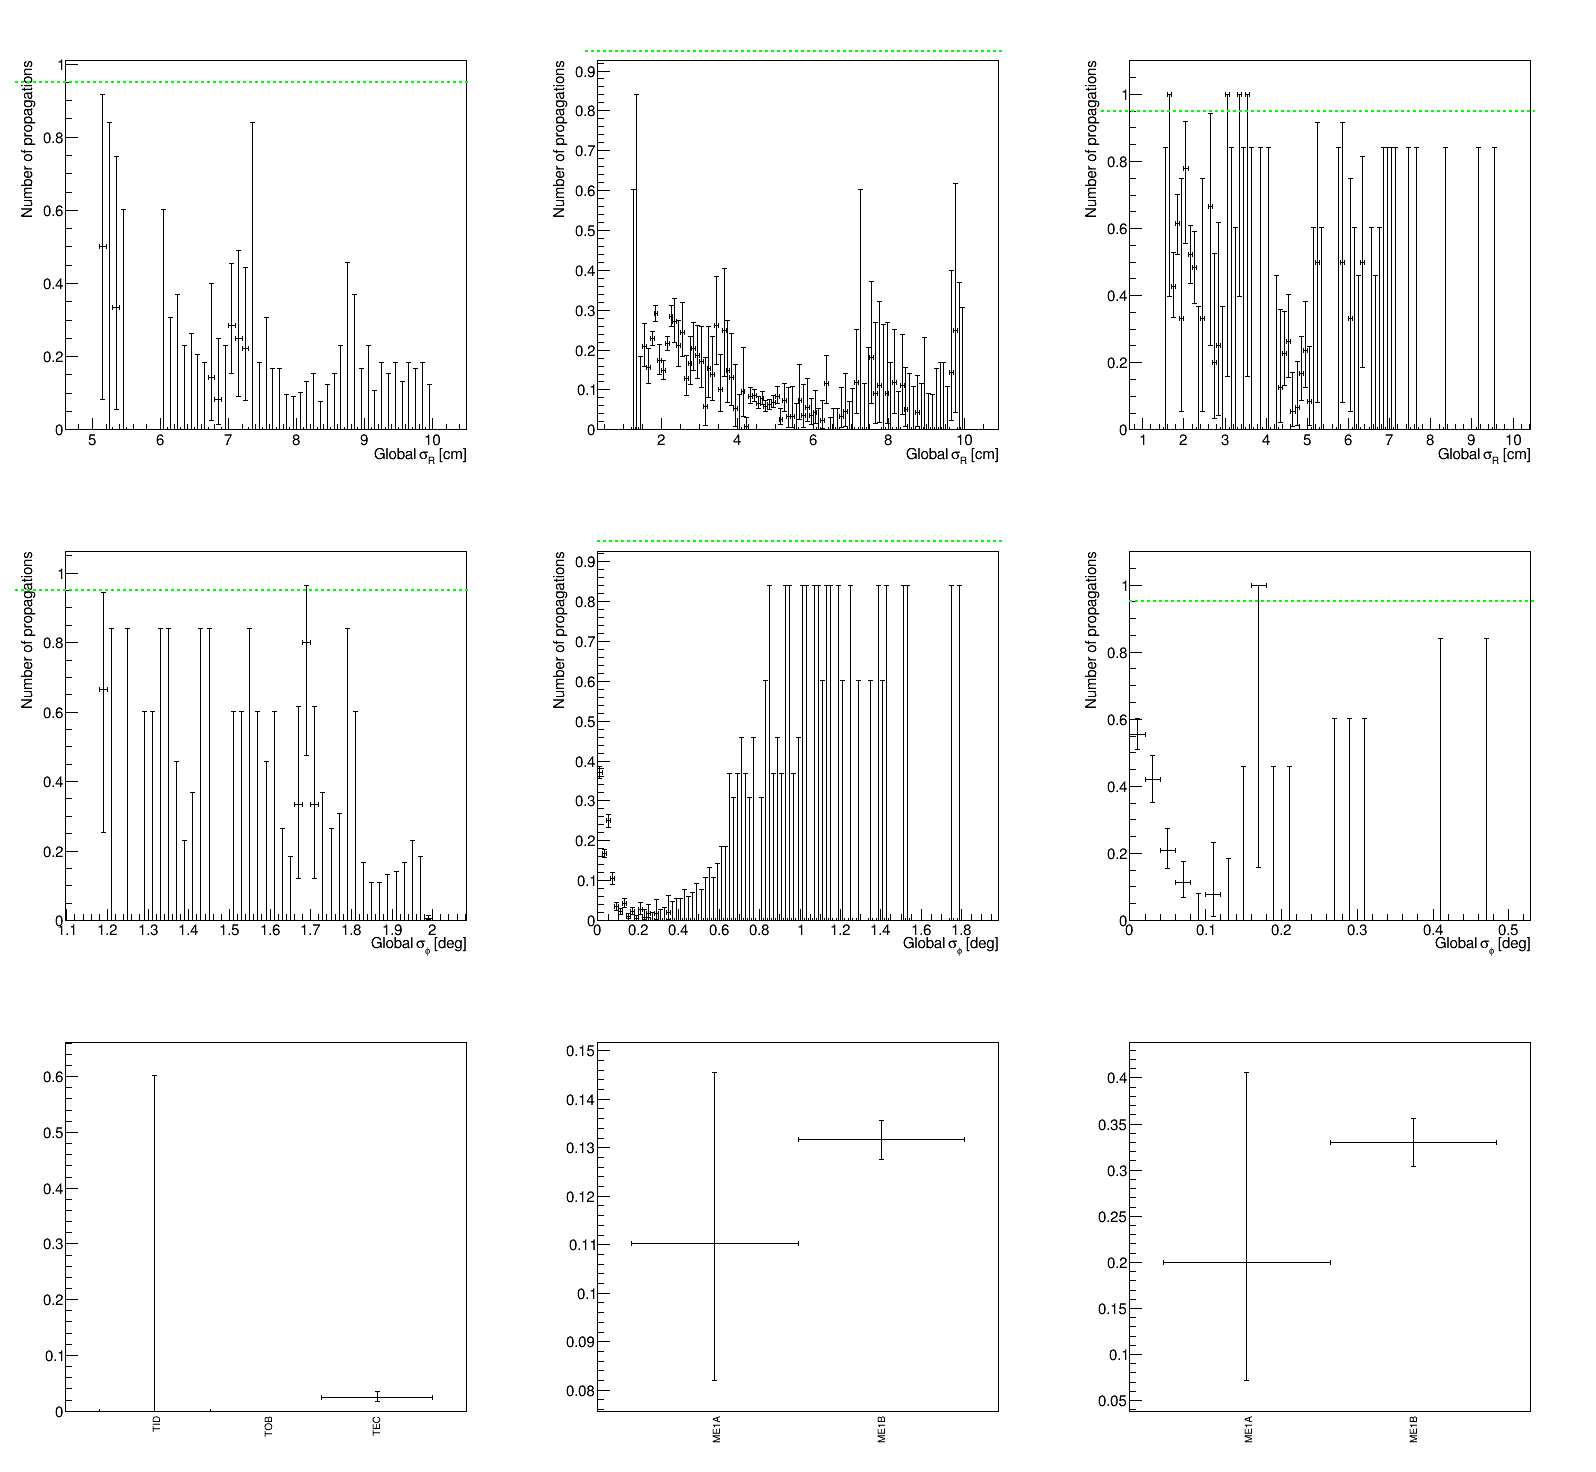

In [10]:
canvas = ROOT.TCanvas(f"c-{uuid.uuid4()}", "", 1600, 1500)
canvas.Divide(3, 3)

###############################################################################
trk_pad = canvas.cd(1)
trk_eff = make_eff(trk_dir, 'Misc/prop_err_r_GE11-P')
trk_eff.Draw()
add_line(trk_pad, trk_eff)

sta_pad = canvas.cd(2)
sta_eff = make_eff(sta_dir, 'Misc/prop_err_r_GE11-P')
sta_eff.Draw()
add_line(sta_pad, sta_eff)

glb_pad = canvas.cd(3)
glb_eff = make_eff(glb_dir, 'Misc/prop_err_r_GE11-P')
glb_eff.Draw()
add_line(glb_pad, glb_eff)

###############################################################################
trk_pad = canvas.cd(4)
trk_eff = make_eff(trk_dir, 'Misc/prop_err_phi_GE11-P')
trk_eff.Draw()
add_line(trk_pad, trk_eff)

sta_pad = canvas.cd(5)
sta_eff = make_eff(sta_dir, 'Misc/prop_err_phi_GE11-P')
sta_eff.Draw()
add_line(sta_pad, sta_eff)

glb_pad = canvas.cd(6)
glb_eff = make_eff(glb_dir, 'Misc/prop_err_phi_GE11-P')
glb_eff.Draw()
add_line(glb_pad, glb_eff)

###############################################################################
trk_pad = canvas.cd(7)
trk_eff = make_eff(trk_dir, 'Misc/start_det_GE11-P')
trk_eff.Draw()
add_line(trk_pad, trk_eff)

sta_pad = canvas.cd(8)
sta_eff = make_eff(sta_dir, 'Misc/start_det_GE11-P')
sta_eff.Draw()
add_line(sta_pad, sta_eff)

glb_pad = canvas.cd(9)
glb_eff = make_eff(glb_dir, 'Misc/start_det_GE11-P')
glb_eff.Draw()
add_line(glb_pad, glb_eff)

###############################################################################
canvas.Draw()

In [ ]:
canvas = ROOT.TCanvas(f"c-{uuid.uuid4()}", "", 1600, 1000)
canvas.Divide(3, 2)

###############################################################################
top_key = 'Efficiency/chamber_GE11-P-L1'

trk_pad = canvas.cd(1)
trk_eff = make_eff(trk_dir, top_key)
trk_eff.Draw()
add_line(trk_pad, trk_eff)

sta_pad = canvas.cd(2)
sta_eff = make_eff(sta_dir, top_key)
sta_eff.Draw()
add_line(sta_pad, sta_eff)

glb_pad = canvas.cd(3)
glb_eff = make_eff(glb_dir, top_key)
glb_eff.Draw()
add_line(glb_pad, glb_eff)

###############################################################################
bottom_key = 'Efficiency/muon_eta_GE11-P'

trk_pad = canvas.cd(4)
trk_eff = make_eff(trk_dir, bottom_key)
trk_eff.Draw()
add_line(trk_pad, trk_eff)

sta_pad = canvas.cd(5)
sta_eff = make_eff(sta_dir, bottom_key)
sta_eff.Draw()
add_line(sta_pad, sta_eff)

glb_pad = canvas.cd(6)
glb_eff = make_eff(glb_dir, bottom_key)
glb_eff.Draw()
add_line(glb_pad, glb_eff)

###############################################################################
canvas.Draw()